In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

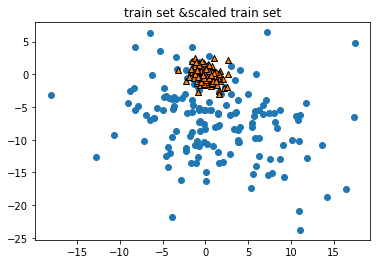

In [4]:
#数据拆分
X,y = make_blobs(n_samples=200,centers=2,cluster_std=5)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=38)
#数据预处理
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#训练
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],marker="^",edgecolors='k')
plt.title('train set &scaled train set')
plt.show()

In [5]:
#导入网格搜索
from sklearn.model_selection import GridSearchCV

In [6]:
params = {'hidden_layer_sizes':[(50,),(100,),(100,100)],'alpha':[0.0001,0.001,0.01,0.1]}
grid = GridSearchCV(MLPClassifier(max_iter=1600,random_state=38),param_grid=params,cv=3)
grid.fit(X_train_scaled,y_train)
grid.best_score_
grid.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100,)}

In [7]:
grid.score(X_test_scaled,y_test)

0.80000000000000004

In [8]:
#导入管道模型
from sklearn.pipeline import Pipeline

In [9]:
pipline = Pipeline([('scaler',StandardScaler()),('mlp',MLPClassifier(max_iter=1600,random_state=38))])
pipline.fit(X_train,y_train)
pipline.score(X_test,y_test)

0.80000000000000004

In [10]:
#设置参数字典
params = {'mlp__hidden_layer_sizes':[(50,),(100,),(100,100)],'mlp__alpha':[0.0001,0.001,0.01,0.1]}

In [11]:
grid = GridSearchCV(pipline,param_grid=params,cv=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rat...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'mlp__hidden_layer_sizes': [(50,), (100,), (100, 100)], 'mlp__alpha': [0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
grid.best_score_,grid.best_params_,grid.score(X_test,y_test)

(0.80000000000000004,
 {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (50,)},
 0.81999999999999995)

In [13]:
pipline.steps

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('mlp',
  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
         beta_2=0.999, early_stopping=False, epsilon=1e-08,
         hidden_layer_sizes=(100,), learning_rate='constant',
         learning_rate_init=0.001, max_iter=1600, momentum=0.9,
         nesterovs_momentum=True, power_t=0.5, random_state=38, shuffle=True,
         solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
         warm_start=False))]